# Importing Libraries

In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#  Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [4]:
def generate_examples(num=1000):
    W = [1.0, -3.0]
    b = 1.0
    
    W = np.reshape(W, (2,1))
    X = np.random.randn(num, 2)
    y = b + np.dot(X,W) + np.random.randn()
    y = np.reshape(y, (num, 1))
    return X, y

In [5]:
X, y = generate_examples()

In [6]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [7]:
print(X[0], y[0])

[-0.49824404 -0.84937621] [3.62867652]


#  Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [8]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features,1)
        self.b = np.random.randn()

In [9]:
model = Model(2)
print(model.W)
print(model.b)

[[-0.43088525]
 [-1.34404065]]
0.21746695331315416


#  Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [10]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [11]:
y_hat= Model(2).forward_pass(X)
print(y_hat.shape)

(1000, 1)


#  Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [12]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])

In [13]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [14]:
loss

6.854349895125859

#  Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [17]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1/m)*np.sum(y_hat - y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y_true), X), axis = 0)
        return dW, db

In [18]:
model  = Model(2)
X, y = generate_examples()
y_hat =  model.forward_pass(X)
dW, db = model.backward_pass(X, y, y_hat)

In [19]:
print(dW, db)

[-0.58285845  3.35636362] 0.6585806187762123


#  Update Parameters

In [21]:
class Model(Model):
    def update_params(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - db

#  Training Loop

In [26]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dW, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10):
                print('Iter:{}, Loss: {:.4f}'.format(i, loss))
        return losses 

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [27]:
model = Model(2)

In [28]:
x_train, y_train = generate_examples()

In [29]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter:1, Loss: 1.2930
Iter:2, Loss: 1.2858
Iter:3, Loss: 1.2787
Iter:4, Loss: 1.2716
Iter:5, Loss: 1.2645
Iter:6, Loss: 1.2575
Iter:7, Loss: 1.2505
Iter:8, Loss: 1.2435
Iter:9, Loss: 1.2366
Iter:10, Loss: 1.2298
Iter:11, Loss: 1.2229
Iter:12, Loss: 1.2161
Iter:13, Loss: 1.2094
Iter:14, Loss: 1.2026
Iter:15, Loss: 1.1960
Iter:16, Loss: 1.1893
Iter:17, Loss: 1.1827
Iter:18, Loss: 1.1761
Iter:19, Loss: 1.1696
Iter:20, Loss: 1.1631
Iter:21, Loss: 1.1566
Iter:22, Loss: 1.1502
Iter:23, Loss: 1.1438
Iter:24, Loss: 1.1374
Iter:25, Loss: 1.1311
Iter:26, Loss: 1.1248
Iter:27, Loss: 1.1186
Iter:28, Loss: 1.1124
Iter:29, Loss: 1.1062
Iter:30, Loss: 1.1000
Iter:31, Loss: 1.0939
Iter:32, Loss: 1.0878
Iter:33, Loss: 1.0818
Iter:34, Loss: 1.0758
Iter:35, Loss: 1.0698
Iter:36, Loss: 1.0639
Iter:37, Loss: 1.0579
Iter:38, Loss: 1.0521
Iter:39, Loss: 1.0462
Iter:40, Loss: 1.0404
Iter:41, Loss: 1.0346
Iter:42, Loss: 1.0289
Iter:43, Loss: 1.0231
Iter:44, Loss: 1.0175
Iter:45, Loss: 1.0118
Iter:46, Loss: 1.00

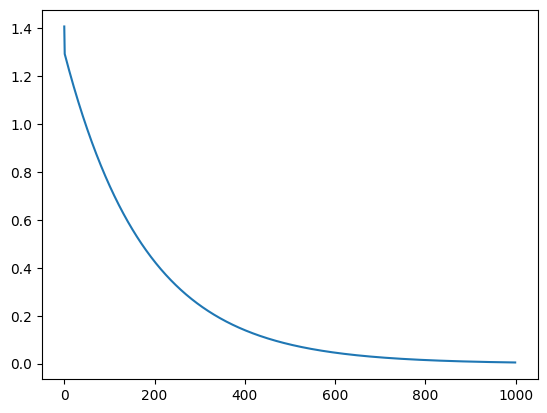

In [30]:
plt.plot(losses);

#  Predictions

In [31]:
model_untrained = Model(2)
x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [32]:
preds_untrained  = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

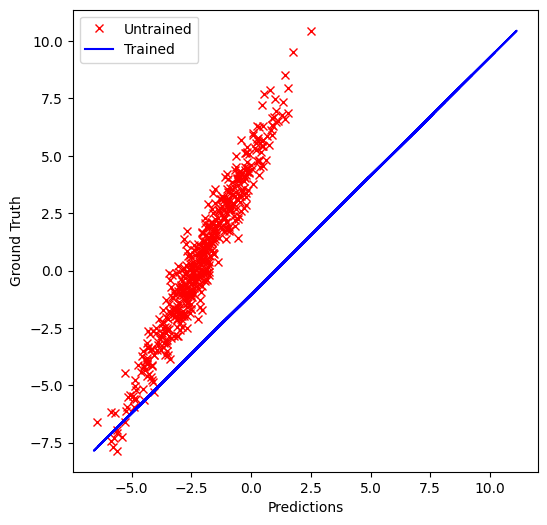

In [34]:
plt.figure(figsize=(6,6))
plt.plot(preds_untrained, y_test, 'rx', label= 'Untrained')
plt.plot(preds_trained, y_test, 'b', label = 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()